In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from train.train_semihebb import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *

In [2]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.001             
TSNE = True

In [3]:
#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))
#load CIFAR-10 dataset

60000
10000


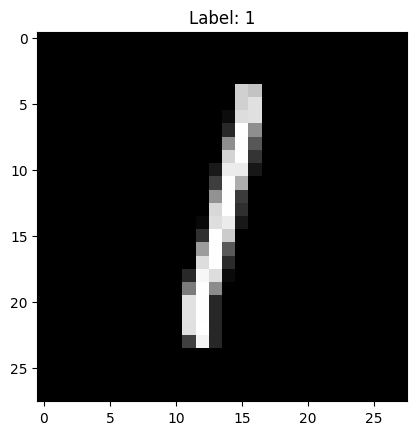

In [4]:
# Plot one example
plot_example(train_loader)

# Train with Hebb rule

note that hebbian weights goes to infinity, values will be NaN after they go out of the range, so tSNE plot cannot be used.

In [5]:
TSNE = False

In [6]:
# create model instance

hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='hebb',p=None)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

In [7]:
# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [8]:
# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

Epoch: 0, Step: 0, Loss: 2.285526990890503, Accuracy: 9.88%
Epoch: 0, Step: 50, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 100, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 150, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 200, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 250, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 300, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 350, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 400, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 450, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 500, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 550, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 600, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 650, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 700, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 750, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 800, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 850, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 900, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 950, Loss: nan, Accuracy: 9.8%
Epoch: 0, Step: 1000, Loss: nan, Accuracy: 9.8%


In [10]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)

Accuracy of the SemiHebbNet on the MNIST test images: 9.8%


9.8

# Train with Oja's rule

In [2]:
# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.0001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# create model instance
hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='oja',p=None)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                  

# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

60000
10000
Epoch: 0, Step: 0, Loss: 2.322434902191162, Accuracy: 9.7%
Epoch: 0, Step: 50, Loss: 2.3417558670043945, Accuracy: 9.36%
Epoch: 0, Step: 100, Loss: 2.30466890335083, Accuracy: 9.93%
Epoch: 0, Step: 150, Loss: 2.3036868572235107, Accuracy: 10.13%
Epoch: 0, Step: 200, Loss: 2.2926180362701416, Accuracy: 10.19%
Epoch: 0, Step: 250, Loss: 2.340087652206421, Accuracy: 10.05%
Epoch: 0, Step: 300, Loss: 2.306126594543457, Accuracy: 10.04%
Epoch: 0, Step: 350, Loss: 2.300002098083496, Accuracy: 10.43%
Epoch: 0, Step: 400, Loss: 2.301267385482788, Accuracy: 10.08%
Epoch: 0, Step: 450, Loss: 2.30279541015625, Accuracy: 10.34%
Epoch: 0, Step: 500, Loss: 2.306166172027588, Accuracy: 10.28%
Epoch: 0, Step: 550, Loss: 2.302325963973999, Accuracy: 10.19%
Epoch: 0, Step: 600, Loss: 2.30098819732666, Accuracy: 10.11%
Epoch: 0, Step: 650, Loss: 2.3039581775665283, Accuracy: 10.32%
Epoch: 0, Step: 700, Loss: 2.301776170730591, Accuracy: 10.28%
Epoch: 0, Step: 750, Loss: 2.3028793334960938, Ac

In [3]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)

Accuracy of the SemiHebbNet on the MNIST test images: 10.09%


10.09

# Train with Gupta's rule

In [2]:
# Hyper Parameters
EPOCH = 10               
BATCH_SIZE = 3
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# create model instance
hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                  

# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

60000
10000
Epoch: 0, Step: 0, Loss: 2.245434284210205, Accuracy: 9.58%
Epoch: 0, Step: 50, Loss: 2.2956690788269043, Accuracy: 10.09%
Epoch: 0, Step: 100, Loss: 2.3050031661987305, Accuracy: 10.08%
Epoch: 0, Step: 150, Loss: 2.310847043991089, Accuracy: 10.1%
Epoch: 0, Step: 200, Loss: 2.295461654663086, Accuracy: 10.1%
Epoch: 0, Step: 250, Loss: 2.2985427379608154, Accuracy: 10.1%
Epoch: 0, Step: 300, Loss: 2.3071508407592773, Accuracy: 10.1%
Epoch: 0, Step: 350, Loss: 2.304858446121216, Accuracy: 10.1%
Epoch: 0, Step: 400, Loss: 2.3032853603363037, Accuracy: 10.1%
Epoch: 0, Step: 450, Loss: 2.2823591232299805, Accuracy: 10.1%
Epoch: 0, Step: 500, Loss: 2.3034074306488037, Accuracy: 10.1%
Epoch: 0, Step: 550, Loss: 2.3024299144744873, Accuracy: 10.1%
Epoch: 0, Step: 600, Loss: 2.2815165519714355, Accuracy: 11.35%
Epoch: 0, Step: 650, Loss: 2.2897701263427734, Accuracy: 11.35%
Epoch: 0, Step: 700, Loss: 2.2851197719573975, Accuracy: 11.35%
Epoch: 0, Step: 750, Loss: 2.2877607345581055

In [ ]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)